### Description

- This code is for EDA task.
- It mainly focuses on three aspects
    - Outlier checking using time-series graph
    - Rolling windows for final input using correlation
    - Checking autocorrelation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import glob
import re
import matplotlib.pyplot as plt
from scipy import signal
import statsmodels.api as sm
import datetime

In [2]:
# Reading files
XTrain_path = r'XTrain.csv'
yTrain_path = r'yTrain.csv'
XTest_path = r'XTest.csv'
yTest_path = r'yTest.csv'

XTrain = pd.read_csv(XTrain_path, on_bad_lines='skip')
yTrain = pd.read_csv(yTrain_path, on_bad_lines='skip')
XTest = pd.read_csv(XTest_path, on_bad_lines='skip')
yTest = pd.read_csv(yTest_path, on_bad_lines='skip')

print('Shape of XTrain: ' + str(XTrain.shape))
print('Shape of yTrain: ' + str(yTrain.shape))
print('Shape of XTest: ' + str(XTest.shape))
print('Shape of yTest: ' + str(yTest.shape))

Shape of XTrain: (34890, 12)
Shape of yTrain: (34723, 2)
Shape of XTest: (8730, 12)
Shape of yTest: (8563, 2)


### Outlier checking using time-series graph

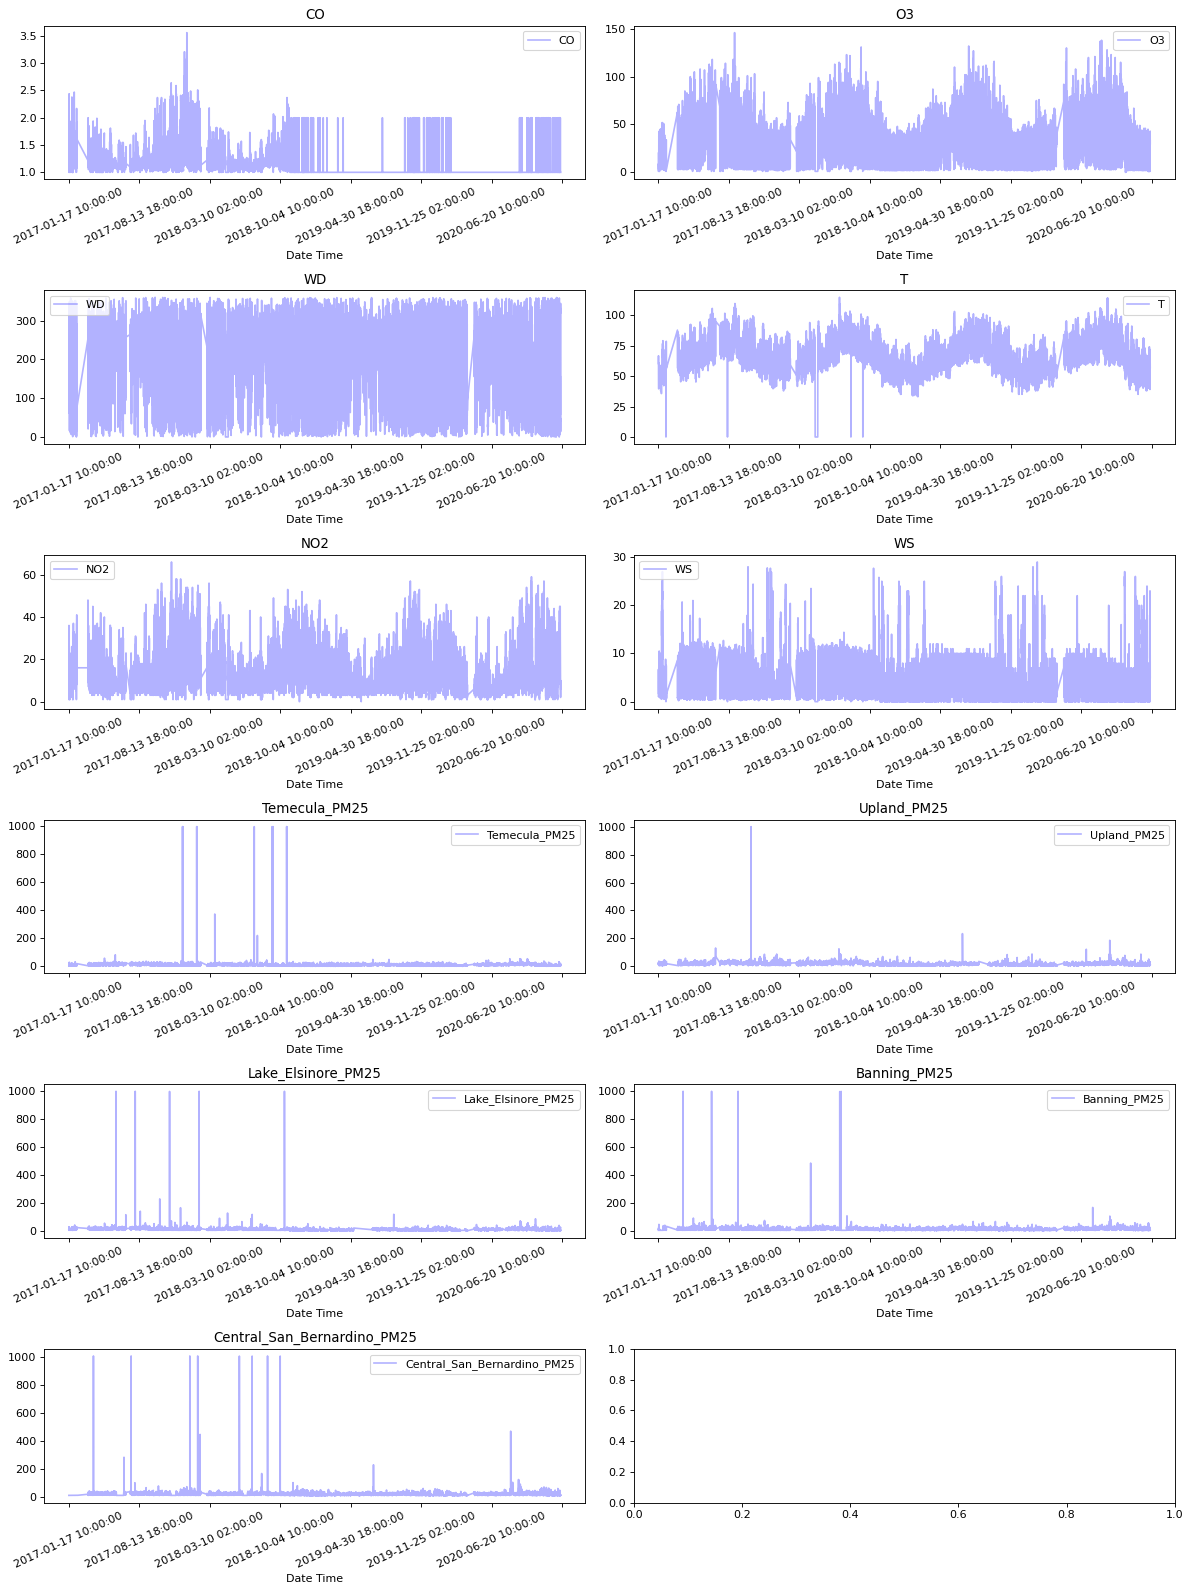

In [3]:
X_temp = XTrain.set_index('Date Time')

fig, axes = plt.subplots(
        nrows=6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )

i=0
for col in X_temp.columns:
  ax = X_temp[col].plot(
            ax=axes[i // 2, i % 2],
            title="{}".format(col),
            rot=25,
            c='blue',
            alpha=0.3
        )
  ax.legend([col])
  i+=1

plt.tight_layout()

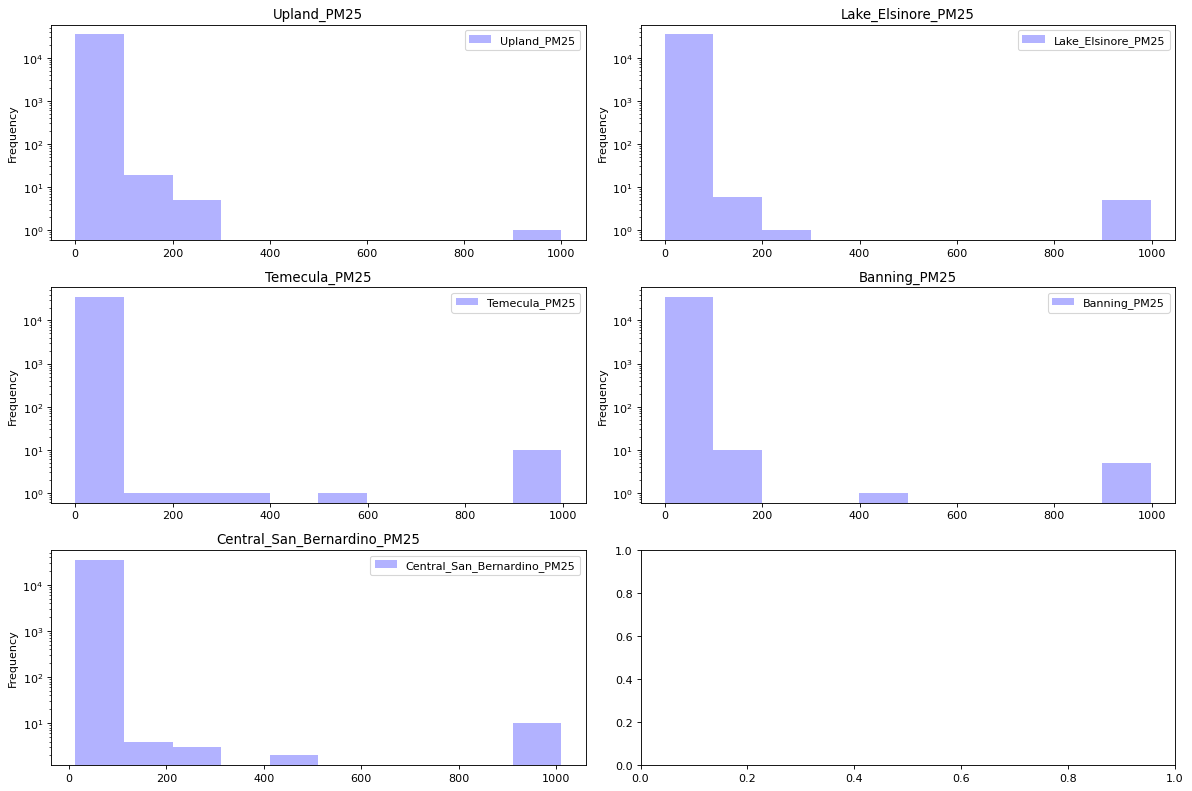

In [4]:
# PM25 data
columns=['Upland_PM25', 'Lake_Elsinore_PM25', 'Temecula_PM25', 'Banning_PM25', 'Central_San_Bernardino_PM25']


fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 10), dpi=80, facecolor="w", edgecolor="k"
    )

i=0
for col in columns:
  ax = X_temp[col].plot(
            ax=axes[i // 2, i % 2],
            title="{}".format(col),
            kind='hist',
            log=True,
            color='blue',
            alpha=0.3
        )
  ax.legend([col])
  i+=1

plt.tight_layout()

In [5]:
# Handling outliers
# Small subset of PM25 value is much higher than average
# Clip PM25 values to 0~100 (Over 100 is very poor according to the EPA)

XTrain[columns] = np.clip(XTrain[columns], a_min=0, a_max=100)
XTest[columns] = np.clip(XTest[columns], a_min=0, a_max=100)
XTrain

,Date Time,CO,O3,WD,T,NO2,WS,Temecula_PM25,Upland_PM25,Lake_Elsinore_PM25,Banning_PM25,Central_San_Bernardino_PM25
0,2017-01-17 10:00:00,1.2,20.0,163.30,60.20,19.0,1.7,6.0,19.000000,7.0,5.0,15.0
1,2017-01-17 11:00:00,1.1,10.5,250.15,62.75,10.0,2.8,6.5,21.000000,6.0,6.5,15.0
2,2017-01-17 12:00:00,1.0,1.0,337.00,65.30,1.0,3.9,7.0,23.000000,5.0,8.0,15.0
3,2017-01-17 13:00:00,1.0,1.0,282.40,65.60,1.0,6.7,4.0,14.000000,5.0,9.0,15.0
4,2017-01-17 14:00:00,1.0,1.0,275.70,66.50,1.0,5.9,2.0,12.000000,5.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34885,2021-01-09 23:00:00,1.0,43.0,344.00,64.00,2.0,18.0,8.0,11.833333,7.0,11.0,14.0
34886,2021-01-10 00:00:00,1.0,35.0,23.00,60.00,7.0,7.0,11.0,11.916667,7.0,14.0,14.0
34887,2021-01-10 01:00:00,1.0,36.0,14.00,60.00,6.0,8.0,11.0,12.000000,6.0,12.0,16.0
34888,2021-01-10 02:00:00,1.0,29.0,57.00,57.00,10.0,6.0,9.0,12.000000,5.0,9.0,17.0


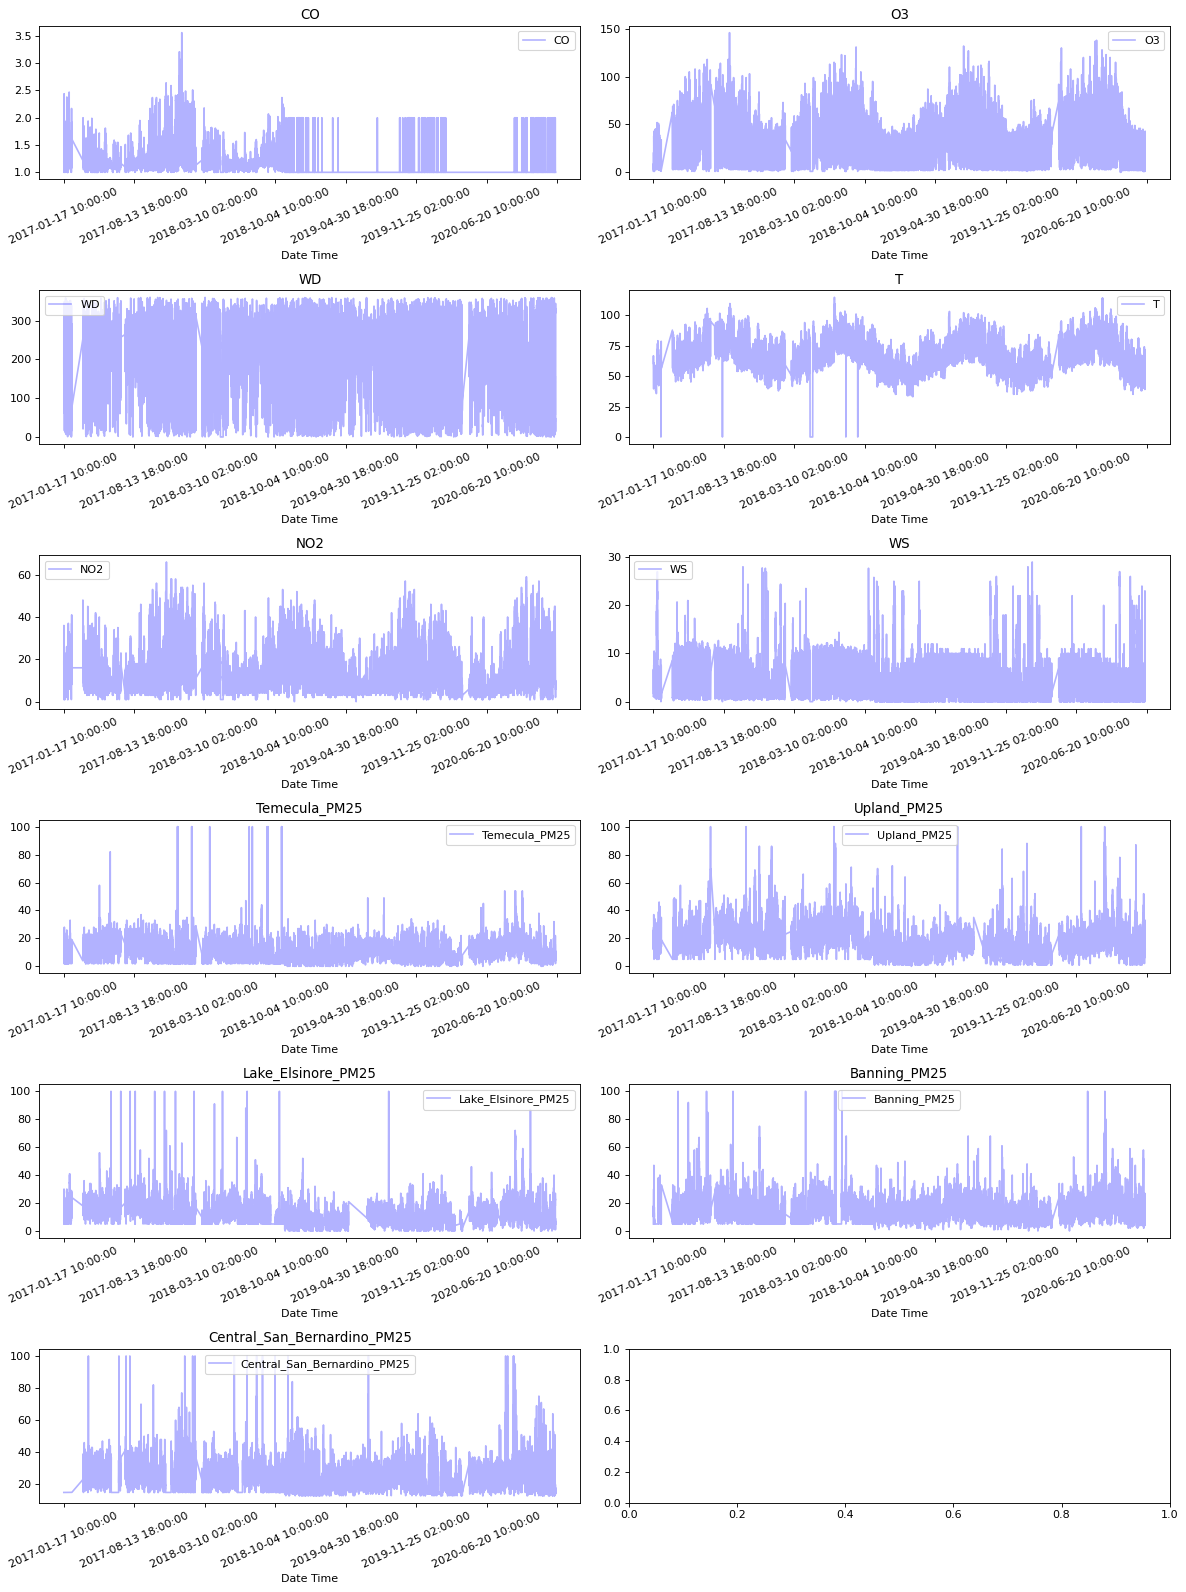

In [6]:
X_temp = XTrain.set_index('Date Time')

fig, axes = plt.subplots(
        nrows=6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )

i=0
for col in X_temp.columns:
  ax = X_temp[col].plot(
            ax=axes[i // 2, i % 2],
            title="{}".format(col),
            rot=25,
            c='blue',
            alpha=0.3
        )
  ax.legend([col])
  i+=1

plt.tight_layout()

In [7]:
# Handling outliers Y
# Small subset of PM25 value is much higher than average
# Clip PM25 values to 0~100 (Over 100 is very poor according to the EPA)

yTrain['PM25'] = np.clip(yTrain['PM25'], a_min=0, a_max=100)
yTest['PM25'] = np.clip(yTest['PM25'], a_min=0, a_max=100)

yTrain.describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
PM25,34723.0,20.084785,10.842196,0.0,7.0,9.0,13.0,18.0,25.0,32.0,39.0,59.0,100.0


### Correlation

<AxesSubplot:>

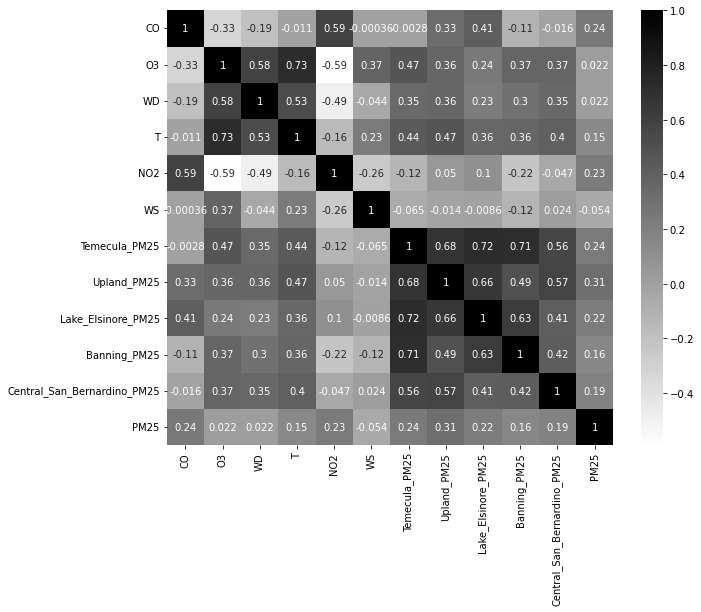

In [13]:
# Correlation with past 7day's average & target value
import seaborn as sns

r_Train = XTrain.loc[:, XTrain.columns != 'Date Time'].rolling(168).mean()
r_Train = r_Train.dropna(inplace=False).reset_index(drop=True)

total = pd.merge(r_Train, yTrain, left_index=True, right_index=True)



plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(total.corr(), annot=True, cmap='gray_r')

<AxesSubplot:>

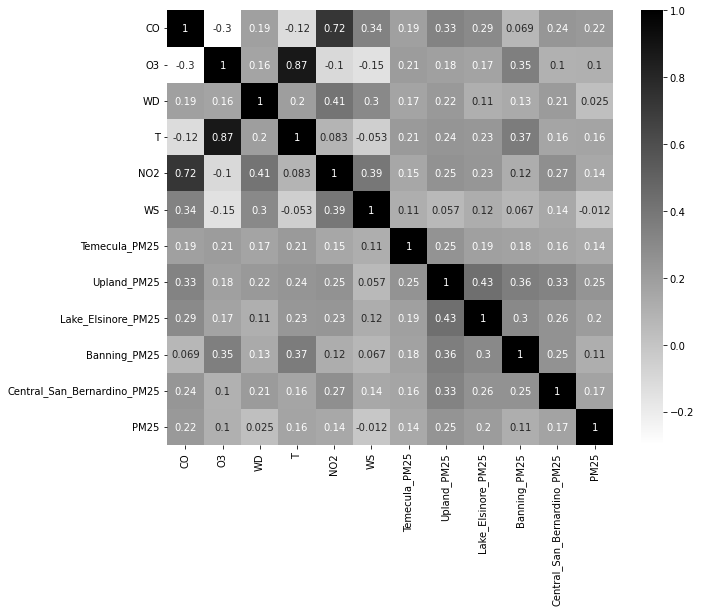

In [15]:
# Correlation with past 7day's max & target value
import seaborn as sns

r_Train = XTrain.loc[:, XTrain.columns != 'Date Time'].rolling(168).max()
r_Train = r_Train.dropna(inplace=False).reset_index(drop=True)

total = pd.merge(r_Train, yTrain, left_index=True, right_index=True)



plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(total.corr(), annot=True, cmap='gray_r')

<AxesSubplot:>

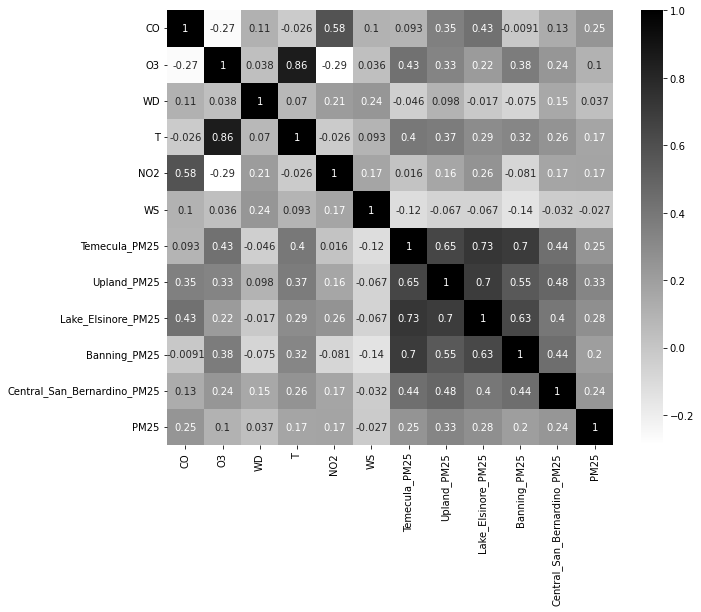

In [16]:
# Correlation with past 7day's quantile(0.9) & target value
import seaborn as sns

r_Train = XTrain.loc[:, XTrain.columns != 'Date Time'].rolling(168).quantile(0.9, interpolation='midpoint')
r_Train = r_Train.dropna(inplace=False).reset_index(drop=True)

total = pd.merge(r_Train, yTrain, left_index=True, right_index=True)



plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(total.corr(), annot=True, cmap='gray_r')

In [19]:
# Correlation with past 7day's target station's PM25 average & target value
import seaborn as sns

r_y = yTrain[:-24].loc[:, yTrain.columns!='Date Time'].rolling(168).mean()
r_y = r_y.dropna(inplace=False).reset_index(drop=True)

total = pd.merge(r_y, yTrain[167+24:]['PM25'].rename('target'), left_index=True, right_index=True)
total.corr()

,PM25,target
PM25,1.000000,0.475035
target,0.475035,1.000000


In [20]:
# Correlation with past 7day's target station's PM25 max & target value
import seaborn as sns

r_y = yTrain[:-24].loc[:, yTrain.columns!='Date Time'].rolling(168).max()
r_y = r_y.dropna(inplace=False).reset_index(drop=True)

total = pd.merge(r_y, yTrain[167+24:]['PM25'].rename('target'), left_index=True, right_index=True)
total.corr()

,PM25,target
PM25,1.000000,0.304557
target,0.304557,1.000000


### Auto-correlation

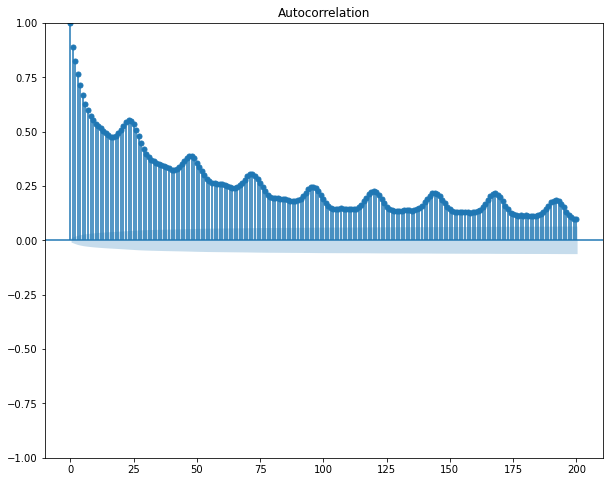

In [21]:
# Auto-Correlation
# We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
# https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(yTrain['PM25'], lags=200)
plt.show()

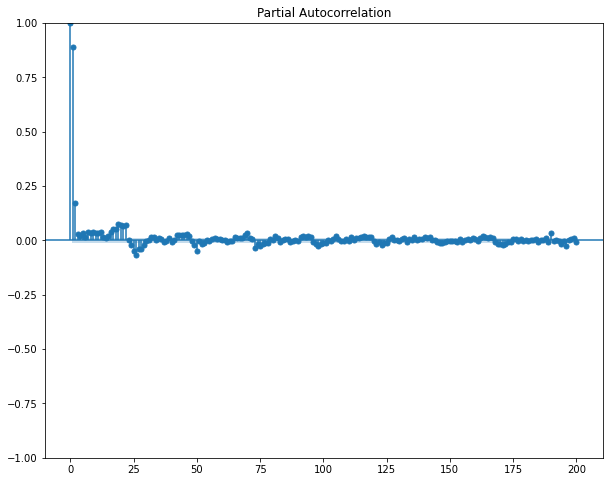

In [23]:
# Partial Auto Correlation
# A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(yTrain['PM25'], lags=200, method='ywm')
plt.show()